# Pandenomics

## The Bruhs' Final Report

* Aleksandar Kartelyan
* Karan Shah
* Ramzi Rimawi
* Thomas Sobczak
* Ryan Thommes

## Project Introduction
The pandemic has caused inflation across the nation, thus increasing cost in all stages in production of goods. Inflation and increased prices of goods and services affects everyone in the country from workers to businesses to everyday people. Our goal is to analyze different impacts the COVID-19 pandemic has had on the economy and the nation overall. And our question is, How has the COVID-19 pandemic caused prices to increase in the US?

## Data Cleaning
<font color='green'>DONE</font>

Data Cleaning - Retrieved and downloaded CSV from database and used pandas to clean and store data in a dataframe for easy use.
The data used is Consumer Price Index (CPI) from https://www.bls.gov/data/. The data was filtered for All Urban Consumers data from 2000-2022.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import random
from scipy import stats


data_cols = ['Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','HALF1','HALF2']

data = pd.read_csv("CPI-U.csv", names=data_cols)
data = data.iloc[1: , :]
data.drop(data.iloc[:, 13:15], inplace = True, axis = 1)
data = data.replace(r'^\s*$', np.nan, regex=True)
data.head(4) #rows 1-4 shows years 2000-2003, but the data goes from 2000 - 2022

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,2000,168.8,169.8,171.2,171.3,171.5,172.4,172.8,172.8,173.7,174.0,174.1,174.0
2,2001,175.1,175.8,176.2,176.9,177.7,178.0,177.5,177.5,178.3,177.7,177.4,176.7
3,2002,177.1,177.8,178.8,179.8,179.8,179.9,180.1,180.7,181.0,181.3,181.3,180.9
4,2003,181.7,183.1,184.2,183.8,183.5,183.7,183.9,184.6,185.2,185.0,184.5,184.3


## Exploratory Data Analysis
<font color='red'>TODO:</font>
- 5 EDA Components
- Missing conclusions/issues
- Unclear what code was used for EDA
- Unclear data structure 
- Unclear data granularity
- Unclear data scope
- Unclear temporality

Data Granularity - The CPI data was collected monthly for each U.S. city it includes cost averages in food, energy, gasoline, etc.
The monthly CPI data was aggregated by year in each group (pre-Covid and post-Covid).
We also looked at different data sources (PPI).


## Data Visualization

<font color='red'>TODO:</font>
- 3 visualizations total
- The visualizations can be improved. If you are trying to compare before and after covid, you need to combine into one visualization with two bars (before and after) for each month. Comparison across is hard. You need to explain what CPI is and have some takeaways. Is there a meaning of the months? If not, this may not be the best visualization and you need to try more before you find something more meaningful.
-  For each visualization, you should follow the guidelines from HW 2, parts Q2.2-2.4 (headline, visualization, description)

Text(0, 0.5, 'Average CPI')

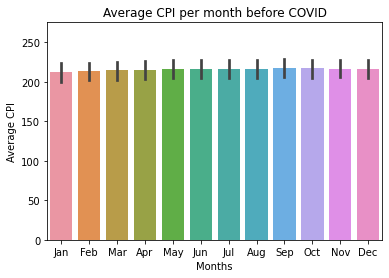

In [37]:
pre_covid_yrs = data[(data['Year'] <= '2019')].astype(float)
covid_yrs = data[(data['Year'] > '2019') & (data['Year'] < '2022')].astype(float)

pre_covid_yrs.drop('Year', axis=1, inplace=True)
covid_yrs.drop('Year', axis=1, inplace=True)

p = sns.barplot(data = pre_covid_yrs)
p.set(ylim=(0,275))
p.set(title='Average CPI per month before COVID')
p.set_xlabel("Months")
p.set_ylabel("Average CPI")


Text(0, 0.5, 'Average CPI')

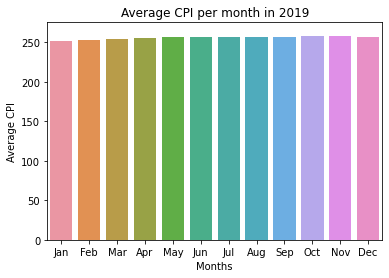

In [38]:
cpi_2019 = data[(data['Year'] == '2019')].astype(float)

cpi_2019.drop('Year', axis=1, inplace=True)

p = sns.barplot(data = cpi_2019)
p.set(ylim=(0,275))
p.set(title='Average CPI per month in 2019')
p.set_xlabel("Months")
p.set_ylabel("Average CPI")


Text(0, 0.5, 'Average CPI')

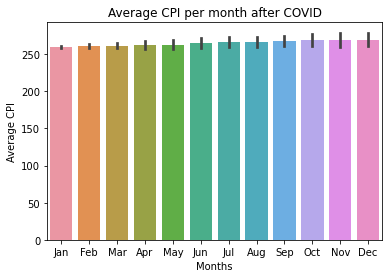

In [39]:
pn = sns.barplot(data = covid_yrs)
p.set(ylim=(0,275))
pn.set(title='Average CPI per month after COVID')
pn.set_xlabel("Months")
pn.set_ylabel("Average CPI")

[Text(0.5, 0, 'Years'),
 Text(0, 0.5, 'Average CPI'),
 Text(0.5, 1.0, 'Average CPI per year 2013-2022')]

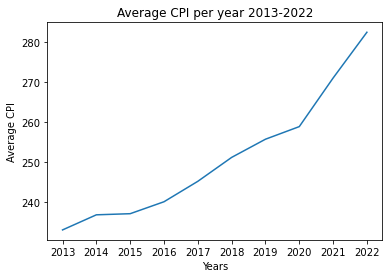

In [17]:
#Average CPI values per year for the last 10 years
#Visualized in a line graph

covid = data.astype(float)
covid.drop('Year', axis=1, inplace=True)

covid['average'] = covid.mean(axis=1)
covid.drop(covid.iloc[:, 0:12], inplace=True, axis=1)
data_cols = ['2013','2014','2015', '2016',
            '2017', '2018', '2019', '2020', '2021', '2022']
a=sns.lineplot(data=covid[-10:], x=data_cols, y="average")
a.set(xlabel="Years", ylabel="Average CPI", title='Average CPI per year 2013-2022')

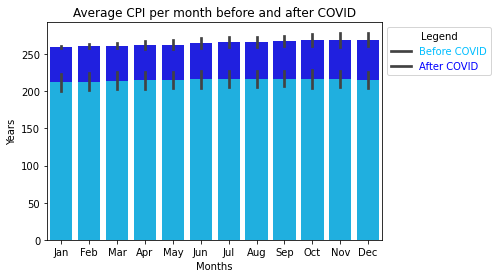

In [40]:
# Stacked bar graph showing difference from before and after COVID
pl = sns.barplot(data = covid_yrs, color="Blue")
pl = sns.barplot(data = pre_covid_yrs, color="deepskyblue")
pl.set(title='Average CPI per month before and after COVID')
pl.set(xlabel="Months", ylabel="Years")
leg = pl.legend(labels=["Before COVID","After COVID"], title = "Legend", loc = 2, bbox_to_anchor = (1,1))
text = leg.get_texts()
text[0].set_color("deepskyblue")
text[1].set_color("Blue")

## ML Analysis

<font color='red'>TODO:</font>
- 2 ML Analysis Total
- Need an evaluation
- No baseline model/classifier or only one model used 
- Unclear experimental setup (e.g., train/test split)
-  I recommend using classification instead of regression here but also choosing a task that is actually meaningful. There is no description of the ML task which makes it harder for me to help. Why are you predicting CPI? What models are you using? What features?

In [42]:
a = []
b = []
c = [2020, 2021]
data[data['Year'] == '2019'].astype(float).aggregate(func = 'average')
for x in range(2000,2020):
    a.append(float(x))
    pd = data[data['Year'] == str(x)].astype(float)
    pd.drop('Year', axis=1, inplace=True)
    b.append(pd.aggregate(func = 'average'))
    
a_1 = b
a = np.array(a).reshape(-1, 1)
b = np.array(b).reshape(-1, 1)
c = np.array(c).reshape(-1, 1)


index_test = random.sample(range(0, 20), 3)

# Baseline Predictor using average inflation of 3.8% (average inflation as mentioned by worlddata.info)

baseline_numbers = [b[0][0]]
for x in range(1, 20):
    baseline_numbers.append(1.031 * baseline_numbers[x - 1])



error3 = 0
for i in range (20):
    if (i not in index_test):
        error3 += 100 * abs(baseline_numbers[i] - b[i]) / b[i]
    
error3 = error3 / 16
    
print("Baseline Training Error:", error3[0], "%")


error4 = 0
for elem in index_test:
    error4 += 100 * abs(baseline_numbers[elem] - b[elem]) / b[elem]

error4 = error4 / 4

print("Baseline Testing Error:", error4[0], "%")

print()



linear_regressor = LinearRegression()  # create object for the class


a_2 = a.copy()

b_2 = b.copy()
a_2 = np.delete(a_2, index_test)
b_2 = np.delete(b_2, index_test)


a_2 = np.array(a_2).reshape(-1, 1)

b_2 = np.array(b_2).reshape(-1, 1)

linear_regressor.fit(a_2, b_2)  # perform linear regression


error1 = 0
for i in range (20):
    if (i not in index_test):
        error1 += 100 * abs(linear_regressor.predict(a[i].reshape(-1, 1))[0][0] - b[i]) / b[i]

error1 = error1 / 16

print("Regression Training Error:", error1[0], "%")


error2 = 0
for elem in index_test:
    error2 += 100 * abs(linear_regressor.predict(a[elem].reshape(-1, 1))[0][0] - b[elem]) / b[elem]
    
error2 = error2 / 4
    
print("Regression Testing Error:", error2[0], "%")

print()



Y_pred = linear_regressor.predict(c)  # make predictions
print("Regression Prediction for 2020 and 2021")
print(Y_pred)


print()
    
error5 = 0
b_1 = []

for x in range(2020,2022):
    cpi = pd.aggregate(func = 'average')
    b_1.append(pd.aggregate(func = 'average'))
    pd = data[data['Year'] == str(x)].astype(float)
    pd.drop('Year', axis=1, inplace=True)
    error5 += 100 * abs(Y_pred[2020 - x][0] - cpi) / cpi
    print("Average CPI for " + str(x) + ": " + str(cpi))
    

error5 = error5 / 2
print("Model Error:", error5, "%")

Baseline Training Error: 8.848796614512379 %
Baseline Testing Error: 3.7011473953500613 %

Regression Training Error: 1.1891346548210742 %
Regression Testing Error: 0.8212861509622413 %

Regression Prediction for 2020 and 2021
[[260.81501664]
 [265.1304192 ]]

Average CPI for 2020: 255.65741666666668
Average CPI for 2021: 258.8111666666667
Model Error: 2.2295166030520015 %


In [43]:
#T-Test for checking if the values of CPI for 2020 and 2021 are different than expected

stats.ttest_ind(a_1, b_1, trim=.2)

Ttest_indResult(statistic=-2.1035416905753723, pvalue=0.0571841055733711)

## Results:
<font color='red'>TODO:</font>

- Evaluate our results here
- Maybe discuss our reults and conclusions about visulizations and ML here?
- Fully explain and analyze the results from your data, i.e. the inferences or correlations you uncovered, the tools you built, or the visualizations you created.



# ML
- 


# T-Test
- In our T-Test, we used significance value of 10% for checking if the values of CPI for 2020 and 2021 are different than expected
- NULL Hypothesis- the CPI values for 2020 and 2021 are same as the average CPI during the past two decades
- Alternate Hypothesis- the CPI values for 2020 and 2021 are not the same as the average CPI during the past two decades
- The p-value from the t-test turned out to be .057, which is enough to conclude that we reject the NULL hypothesis that the CPI values for 2020 and 2021 aren't different